In [6]:
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv("dataset/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA

In [18]:
import matplotlib.pyplot as plt

In [33]:
grp = df.groupby('Gender')['Spending Score (1-100)'].mean()
grp

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

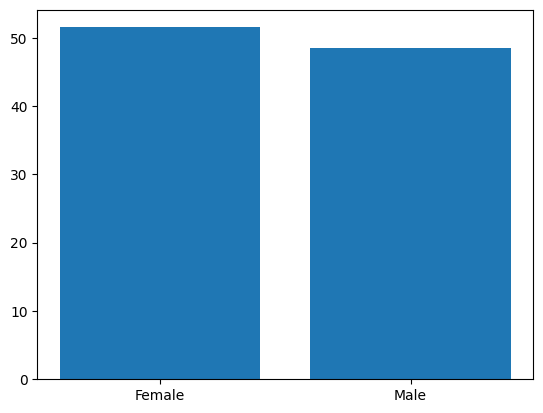

In [34]:
plt.bar(['Female','Male'], grp)
plt.show()

From above graph we can notice that Females won this time also in spending

In [32]:
df.groupby('Gender').agg({'Annual Income (k$)':'mean', 'Spending Score (1-100)':'mean'})

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


Average Annual Income of men are more that womens but womens spend more.

In [25]:
# consolidating age into range 

df['AgeRange'] = df['Age'].apply(lambda x: 0 if x in range(18,30) else 1 if x in range(31,60) else 2)

In [54]:
avg_earning =  df.groupby('AgeRange').agg({'Annual Income (k$)':'mean', 'CustomerID':'count'}).reset_index()
avg_earning

,AgeRange,Annual Income (k$),CustomerID
0,0,52.545455,55
1,1,65.330508,118
2,2,56.037037,27


Text(0, 0.5, 'Avg Income ($)')

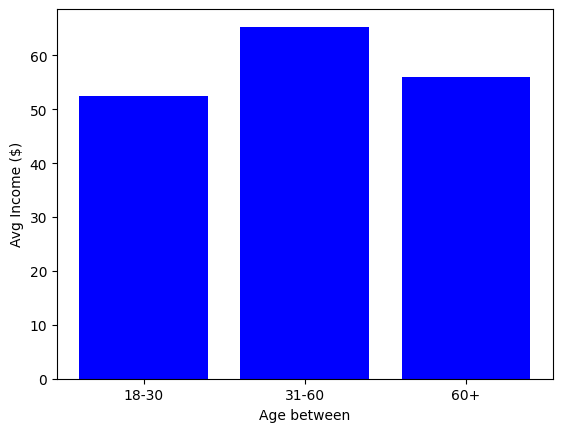

In [48]:
plt.bar(['18-30','31-60', '60+'], avg_earning['Annual Income (k$)'], color='blue')
plt.xlabel('Age between')
plt.ylabel('Avg Income ($)')

We can conclude that people in age between 31 to 60 earn more <br>
Also number of working people in this range in more 

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeRange
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


In [102]:
# Taking data for model training 

X = df[['Spending Score (1-100)', 'Spending Score (1-100)']]
X

,Spending Score (1-100),Spending Score (1-100)
0,39,39
1,81,81
2,6,6
3,77,77
4,40,40
...,...,...
195,79,79
196,28,28
197,74,74
198,18,18


In [103]:
# Deciding number of cluster through Elbow method

sse = []
k_range = range(1,11)

for i in k_range:
    km = KMeans(n_clusters=i)
    model = km.fit(X)
    sse.append(model.inertia_)


Text(0, 0.5, 'sum of squared error')

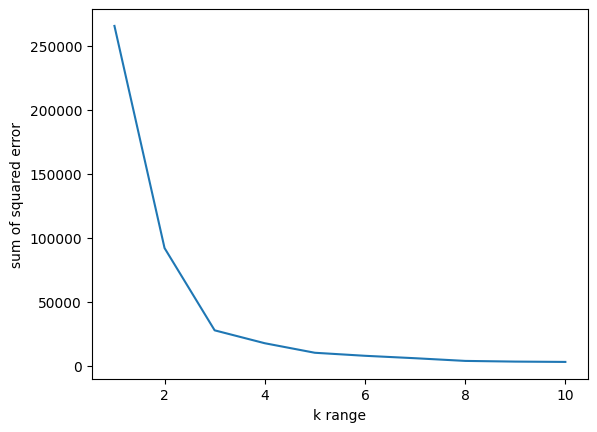

In [104]:
plt.plot(k_range, sse)
plt.xlabel("k range")
plt.ylabel("sum of squared error")

From above plot 5 cluster will be best for our data

In [105]:
# Trainind Model

km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X)
y_pred

array([1, 0, 4, 0, 1, 0, 4, 3, 4, 0, 4, 3, 4, 0, 4, 0, 1, 0, 1, 3, 1, 0,
       4, 0, 4, 0, 1, 2, 1, 3, 4, 0, 4, 3, 4, 0, 4, 0, 1, 0, 1, 3, 1, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 1, 0, 1, 3, 4, 0, 4, 0,
       1, 0, 4, 3, 4, 0, 4, 0, 4, 3, 1, 3, 4, 3, 1, 0, 4, 3, 4, 3, 4, 0,
       4, 3, 4, 0, 4, 0, 1, 3, 4, 3, 1, 0, 4, 3, 1, 2, 4, 0, 4, 3, 4, 3,
       4, 0, 4, 3, 1, 3, 4, 3, 1, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4, 0, 1, 0,
       4, 3], dtype=int32)

In [106]:
df['y_pred'] = y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeRange,y_pred
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,1,1


In [107]:
df0 = df[df['y_pred'] ==0]
df1 = df[df['y_pred'] ==1]
df2 = df[df['y_pred'] ==2]
df3 = df[df['y_pred'] ==3]
df4 = df[df['y_pred'] ==4]

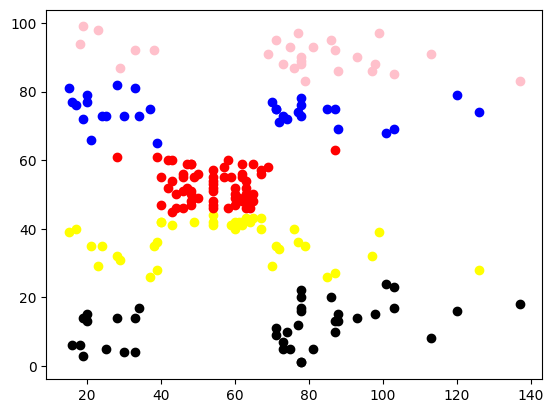

In [108]:
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='blue')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='yellow')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='pink')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='black')